In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from scipy import stats
import joblib

In [21]:
import warnings

warnings.filterwarnings("ignore")

In [22]:
diamonds = pd.read_csv('diamonds_preprocessed.csv')

In [23]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,"(5000, 10000]",0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,"[0, 5000]",0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,"[0, 5000]",0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,"(5000, 10000]",0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,"[0, 5000]",0.066582
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,"[0, 5000]",0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,"[0, 5000]",0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,"[0, 5000]",0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,"[0, 5000]",0.080874


In [24]:
price_classes = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
feature_names = diamonds.columns.to_list()
feature_names.remove('class')
feature_names

['carat', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [25]:
class_to_num = {'[0, 5000]' : 0, '(5000, 10000]' : 1, '(10000, 15000]' : 2, '15000+' : 3}
num_to_class =  {0 : '[0, 5000]', 1 : '(5000, 10000]', 2 : '(10000, 15000]', 3 :'15000+'}

In [26]:
def to_num(y):
  temp = []
  temp_index = y.index
  for i in y:
    temp.append(class_to_num[i])
  return pd.Series(temp, index=temp_index, name='class')

def to_cat(y):
  temp = []
  temp_index = y.index
  for i in y:
    temp.append(num_to_class[i])
  return pd.Series(temp, index=temp_index, name='class')

In [27]:
X = diamonds[feature_names]
y = diamonds['class']

In [28]:
X

,carat,clarity,color,cut,depth,table,x,y,z,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,0.066582
...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,0.080874


In [29]:
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
52325        [0, 5000]
52326        [0, 5000]
52327        [0, 5000]
52328        [0, 5000]
52329        [0, 5000]
Name: class, Length: 52330, dtype: object

In [30]:
y_encoded = to_num(y)

In [31]:
scorers = {
    'accuracy' : make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

***

### Modeli

In [33]:
dtc = joblib.load('DTC.pkl')
knn = joblib.load('KNN.pkl')
mlp = joblib.load('MLP.pkl')
svc = joblib.load('SVC.pkl')
rfc = joblib.load('RFC.pkl')
xgb = joblib.load('XGB.pkl')

In [34]:
models = [dtc, knn, mlp, svc, rfc, xgb]
model_names = [type(model.named_steps['model']).__name__ for model in models]

In [35]:
model_names

['DecisionTreeClassifier',
 'KNeighborsClassifier',
 'MLPClassifier',
 'SVC',
 'RandomForestClassifier',
 'XGBClassifier']

In [36]:
model_scores = []
for i, model in enumerate(models):
  if model_names[i] == 'XGBClassifier':
    scores = cross_validate(model, X, y_encoded, cv=5, scoring=scorers)
    model_scores.append(scores)
  else:
    scores = cross_validate(model, X, y, cv=5, scoring=scorers)
    model_scores.append(scores)

In [37]:
model_scores

[{'fit_time': array([0.82639003, 0.46115184, 0.56938934, 0.51592159, 0.46264291]),
  'score_time': array([0.28521347, 0.25125575, 0.26541018, 0.25102067, 0.25497699]),
  'test_accuracy': array([0.93951844, 0.94009173, 0.94095165, 0.94076056, 0.94458246]),
  'test_precision': array([0.94214033, 0.94305253, 0.94394812, 0.94386739, 0.94670682]),
  'test_recall': array([0.93951844, 0.94009173, 0.94095165, 0.94076056, 0.94458246]),
  'test_f1': array([0.94042144, 0.94127292, 0.94205869, 0.94185493, 0.94546105])},
 {'fit_time': array([0.20163178, 0.22959328, 0.22511816, 0.21355271, 0.19757104]),
  'score_time': array([0.29807878, 0.30006289, 0.30695462, 0.29289341, 0.30072403]),
  'test_accuracy': array([0.94448691, 0.94601567, 0.94563348, 0.94897764, 0.95136633]),
  'test_precision': array([0.94423329, 0.94660858, 0.94578333, 0.94895612, 0.95143615]),
  'test_recall': array([0.94448691, 0.94601567, 0.94563348, 0.94897764, 0.95136633]),
  'test_f1': array([0.9443554 , 0.94628817, 0.94567305,

### Accuracy

In [41]:
accuracy_scores = []
for i in range(6):
  accuracy_scores.append(model_scores[i]['test_accuracy'].mean())

accuracy_scores

[0.9411809669405695,
 0.9472960061150392,
 0.9475826485763423,
 0.9372635199694248,
 0.952723103382381,
 0.9524364609210778]

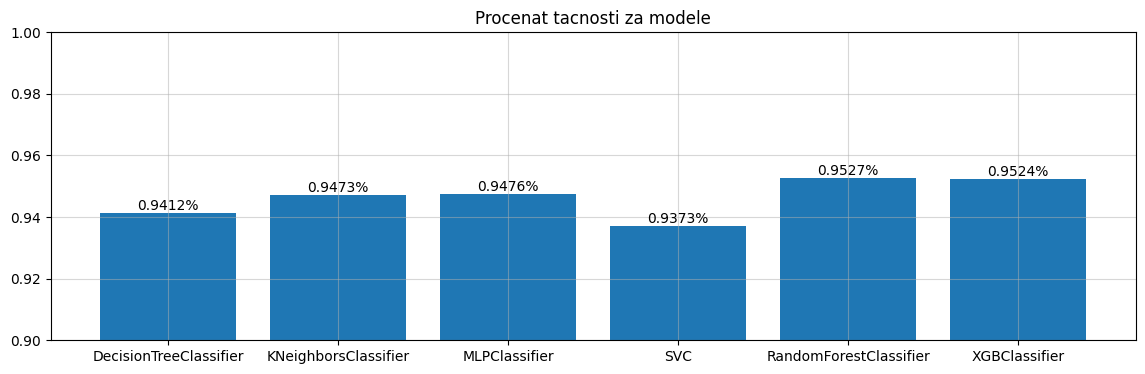

In [44]:
plt.figure(figsize=(14, 4))
plt.bar(model_names, accuracy_scores)
plt.grid(alpha=0.5)
for i, s in enumerate(accuracy_scores):
    plt.text(model_names[i], s, f'{s:.4f}%', ha='center', va='bottom')
plt.ylim(0.9, 1)
plt.title('Procenat tacnosti za modele')
plt.show()

Svi modeli daju zadovoljavajuce rezultate.
Najbolji su **RandomForestClassifier** i **XGBClassifier**, sto je i ocekivano od *ensemble* modela.

### Precision score

Preciznost je metrika koja predstavlja odnos tačno pozitivno klasifikovanih instanci prema zbiru tačno pozitivno i lažno pozitivno klasifikovanih instanci.

In [45]:
precision_scores = []
for i in range(6):
  precision_scores.append(model_scores[i]['test_precision'].mean())

precision_scores

[0.9439430390830983,
 0.9474034930604187,
 0.9477413278683315,
 0.9435859794008419,
 0.952960931259786,
 0.952723203377756]

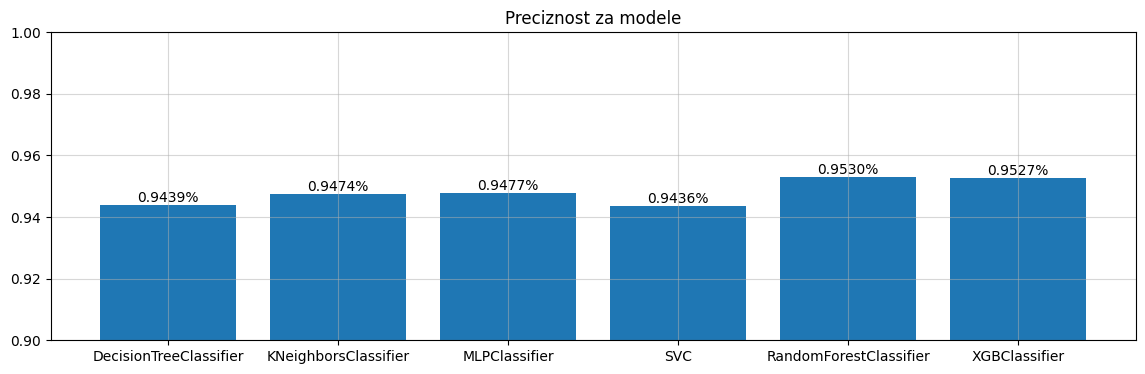

In [47]:
plt.figure(figsize=(14, 4))
plt.bar(model_names, precision_scores)
plt.grid(alpha=0.5)
for i, s in enumerate(precision_scores):
    plt.text(model_names[i], s, f'{s:.4f}%', ha='center', va='bottom')
plt.ylim(0.9, 1)
plt.title('Preciznost za modele')
plt.show()

### Recall score

Odziv predstavlja odnos tačno pozitivno klasifikovanih instanci prema zbiru tačno pozitivno klasifikovanih i lažno negativno klasifikovanih instanci. Odziv meri sposobnost modela da pravilno identifikuje sve pozitivne instance.

In [48]:
recall_scores = []
for i in range(6):
  recall_scores.append(model_scores[i]['test_recall'].mean())

recall_scores

[0.9411809669405695,
 0.9472960061150392,
 0.9475826485763423,
 0.9372635199694248,
 0.952723103382381,
 0.9524364609210778]

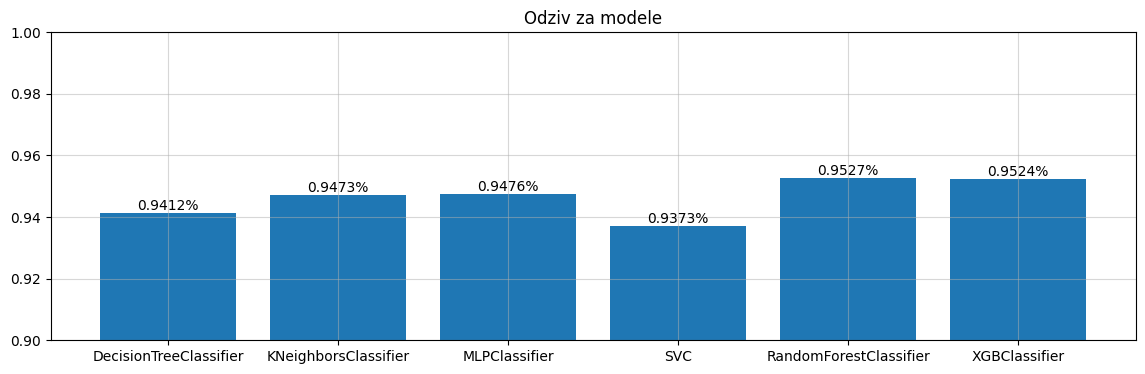

In [50]:
plt.figure(figsize=(14, 4))
plt.bar(model_names, recall_scores)
plt.grid(alpha=0.5)
for i, s in enumerate(recall_scores):
    plt.text(model_names[i], s, f'{s:.4f}%', ha='center', va='bottom')
plt.ylim(0.9, 1)
plt.title('Odziv za modele')
plt.show()

Mozemo primetiti da su *accuracy_score* i *recall_score* jednaki za svaki od 6 modela.

Ako su rezultati preciznosti i odziva jednaki za model, to znaci da je model postigao istu performansu u pogledu tacnog identifikovanja pozitivnih instanci i ukupne tacnosti svojih predvidjanja.

### F1 score

 F1-skor je harmonična sredina preciznosti i odziva. On kombinuje informacije o tačnosti modela u klasifikaciji pozitivnih i negativnih instanci.

In [51]:
f1_scores = []
for i in range(6):
  f1_scores.append(model_scores[i]['test_f1'].mean())

f1_scores

[0.9422138059130241,
 0.9473206047567325,
 0.9474100092228241,
 0.9392491428512318,
 0.9527997595200193,
 0.9525431420180667]

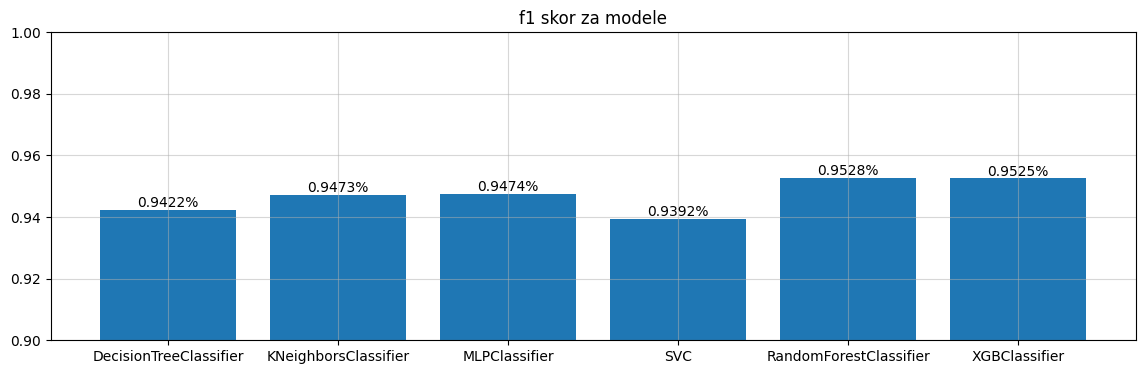

In [53]:
plt.figure(figsize=(14, 4))
plt.bar(model_names, f1_scores)
plt.grid(alpha=0.5)
for i, s in enumerate(f1_scores):
    plt.text(model_names[i], s, f'{s:.4f}%', ha='center', va='bottom')
plt.ylim(0.9, 1.0)
plt.title('f1 skor za modele')
plt.show()

Od svih modela **RandomForestClassifier** pokazuje najbolje ocene.

## Medjusobna poredjenja modela

### Paired t-test

Upareni t-test je statistička metoda koja se koristi za upoređivanje prosečnih vrednosti iz dve grupe merenja koje su međusobno povezane ili uparene. Ova metoda se koristi kada se isti subjekti mere u dve različite situacije, ili kada se isti subjekti mere pre i posle intervencije. Cilj uparenog t-testa je da se utvrdi da li postoji statistički značajna razlika između prosečnih vrednosti u parovima merenja.

Rezultat uparenog t-testa je vrednost t-statistike, koja se koristi za određivanje da li postoji statistički značajna razlika između dve grupe merenja. Takođe se izračunava p-vrednost, koja predstavlja verovatnoću da se dobije razlika u prosečnim vrednostima kao ili veća od one koju smo posmatrali, ako su grupe zaista iste. Ako je p-vrednost manja od unapred odabrane statističke značajnosti (najčešće 0,05), smatra se da postoji statistički značajna razlika između grupa.

In [54]:
from itertools import combinations

In [55]:
ids = [0, 1, 2, 3, 4, 5]
pairs = list(combinations(ids, 2))

In [56]:
def paired_t_test(model1_scores, model2_scores, metric):
    t_statistic, p_value = stats.ttest_rel(model1_scores, model2_scores)

    if p_value < 0.05:
        significance = "Statistically significant"
    else:
        significance = "Not statistically significant"
    
    results = {
        'metric': metric,
        't_statistic': t_statistic,
        'p_value': p_value,
        'significance': significance
    }
    
    return results

In [59]:
t_test_scores = []
for pair in pairs:
  i = pair[0]
  j = pair[1]
  res = paired_t_test(model_scores[i]['test_accuracy'], model_scores[j]['test_accuracy'], 'accuracy')
  t_test_scores.append(res)


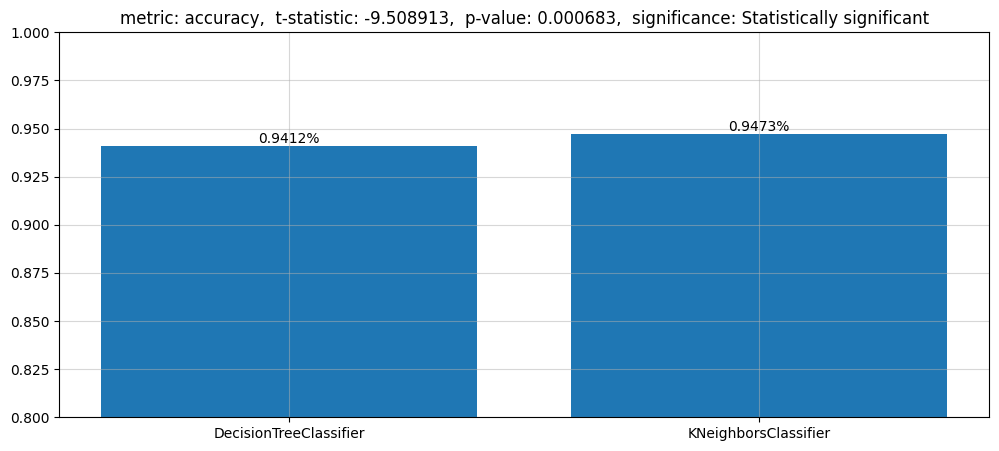

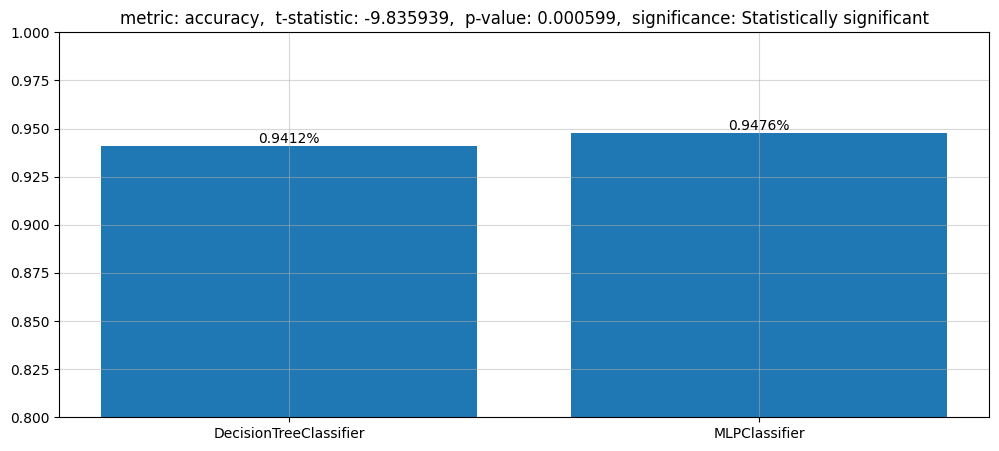

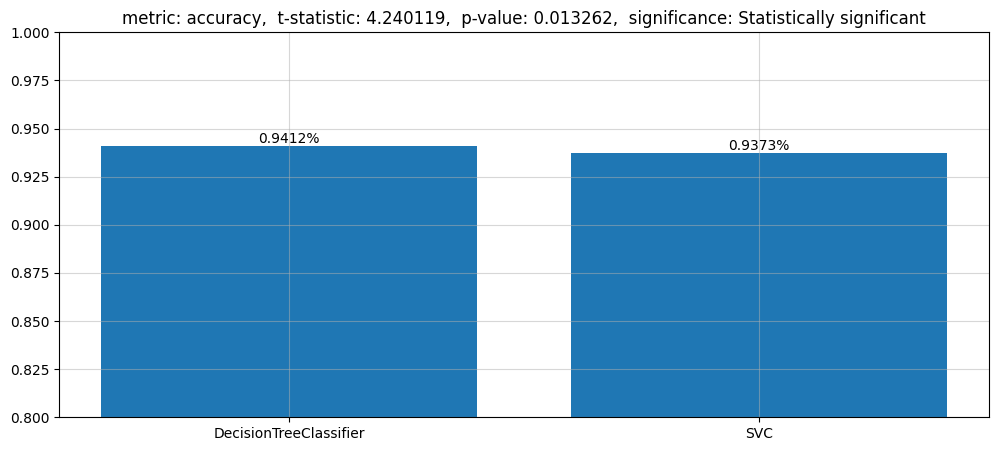

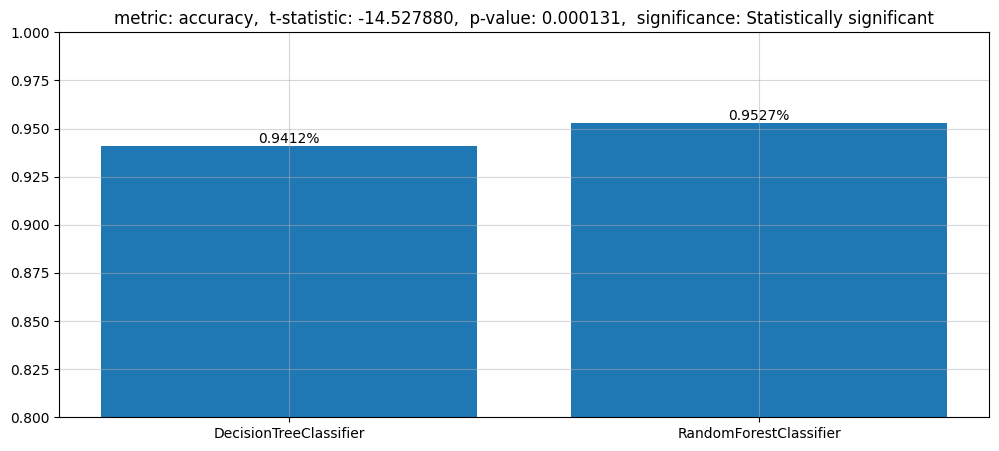

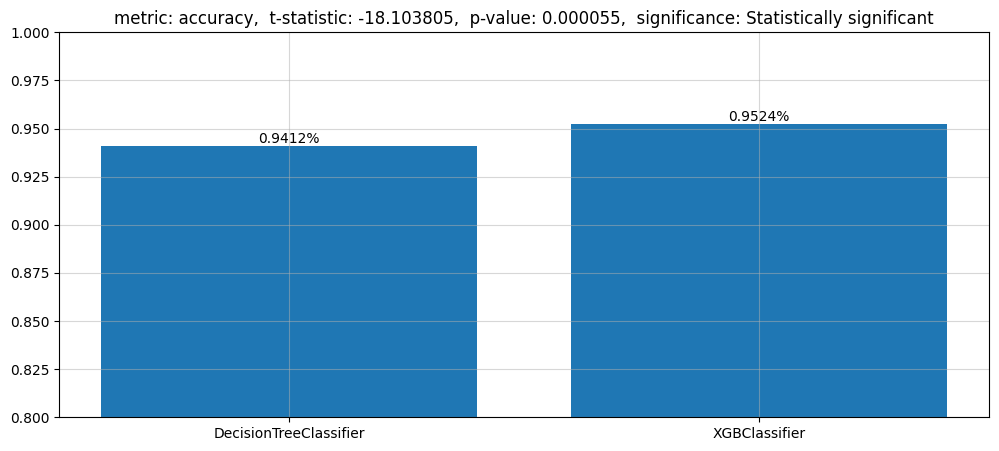

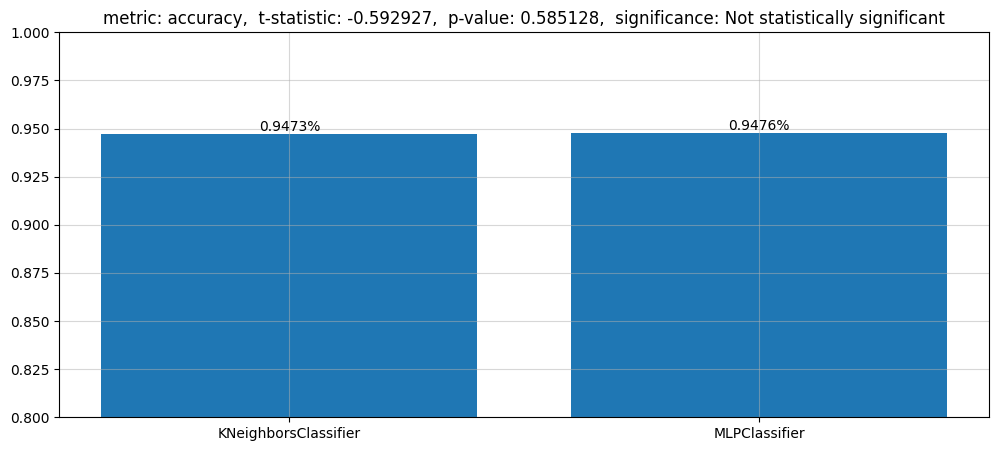

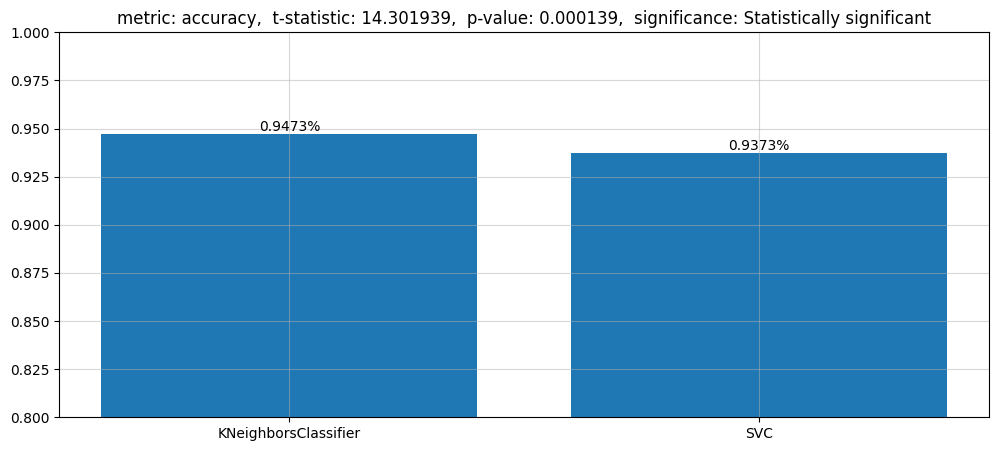

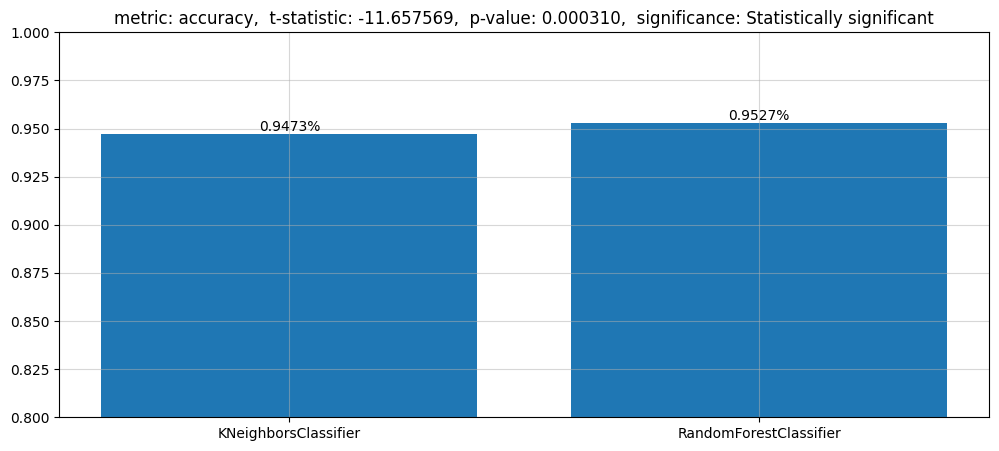

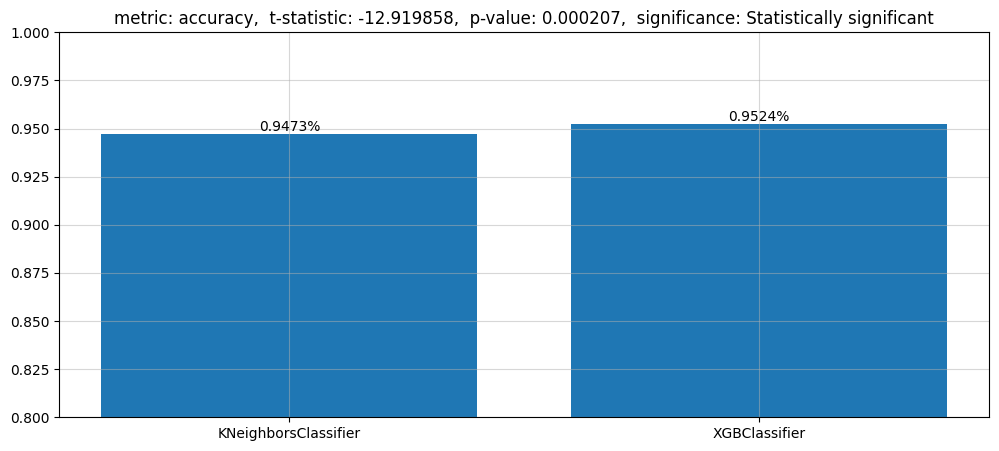

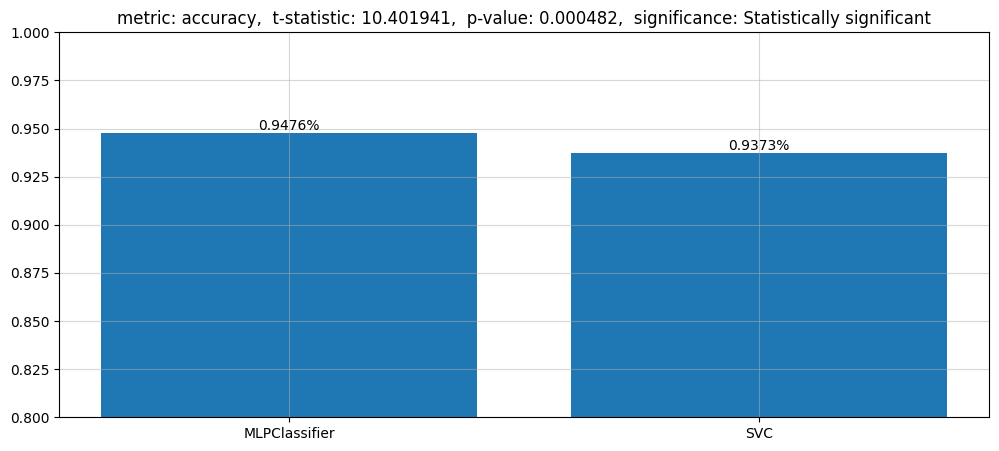

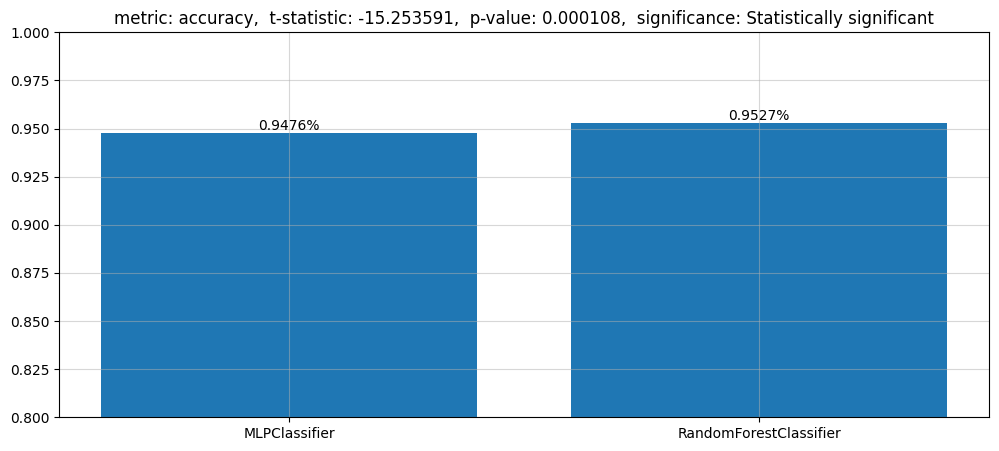

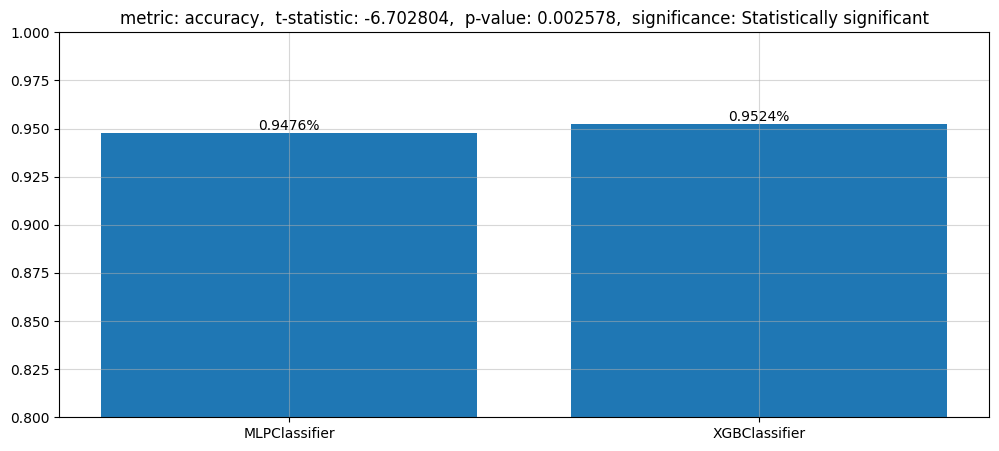

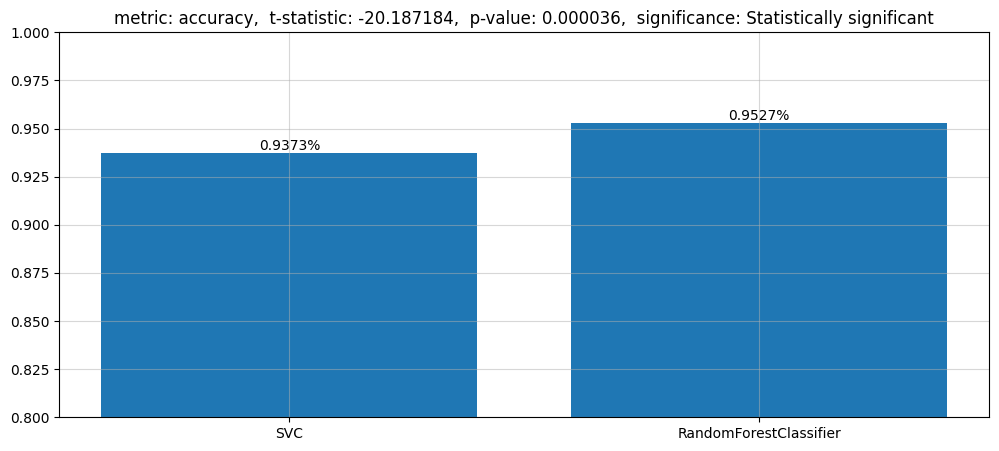

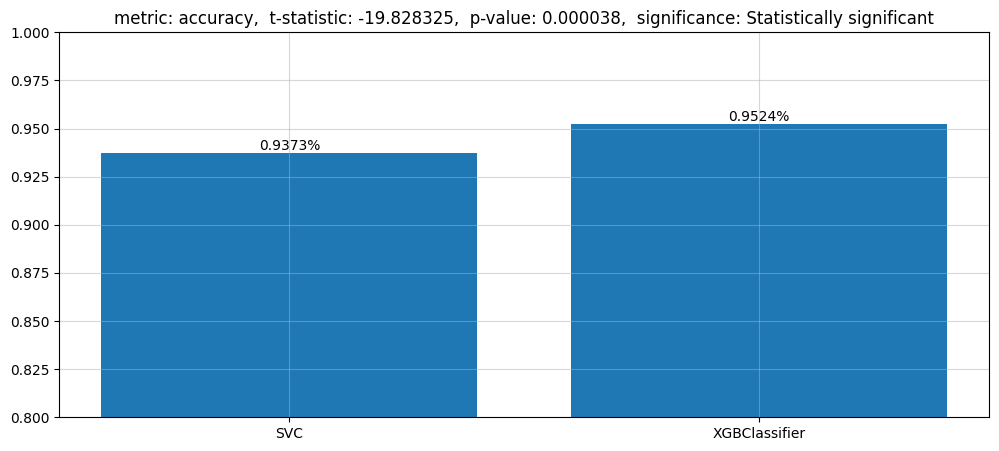

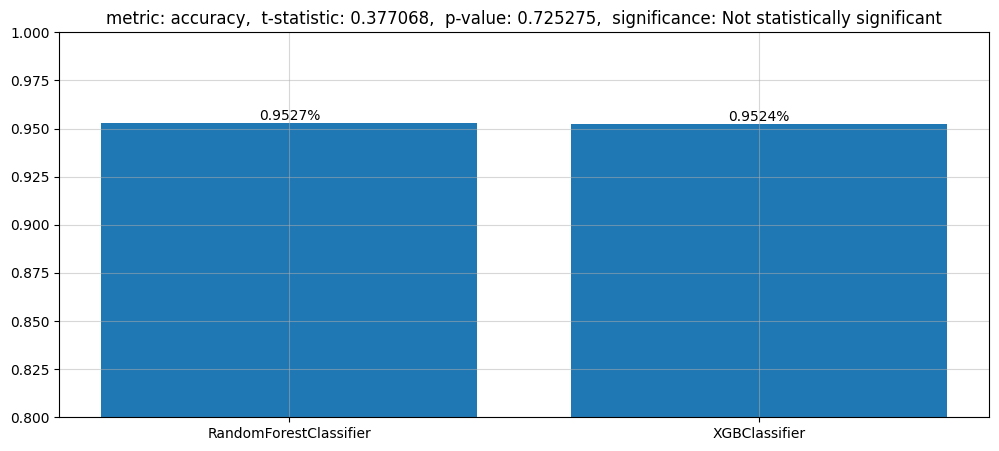

In [61]:
for t, pair in enumerate(pairs):
  t_result = t_test_scores[t]
  models_to_plot = [model_names[pair[0]], model_names[pair[1]]]
  scores_to_plot = [model_scores[pair[0]]['test_accuracy'].mean(), model_scores[pair[1]]['test_accuracy'].mean()]


  metric = t_result['metric']
  t_statistic = t_result['t_statistic']
  p_value = t_result['p_value']
  significance = t_result['significance']

  plt.figure(figsize=(12,5))
  plt.title(f'metric: {metric},  t-statistic: {t_statistic:.6f},  p-value: {p_value:.6f},  significance: {significance}')
  plt.grid(alpha=0.5)
  plt.ylim(0.8, 1)
  plt.bar(models_to_plot, scores_to_plot)
  for i, s in enumerate(scores_to_plot):
    plt.text(models_to_plot[i], s, f'{s:.4f}%', ha='center', va='bottom')



Kao sto je i ocekivano, *ensemble* modeli imaju najbolji performans.  
**RandomForestClassifier** je najbolji, ali nema statisticki bitne razlike u odnosu na **XGBClassifier**.

### Runtime and scalability

In [62]:
import time

In [63]:
class_to_num = {'[0, 5000]' : 0, '(5000, 10000]' : 1, '(10000, 15000]' : 2, '15000+' : 3}
num_to_class =  {0 : '[0, 5000]', 1 : '(5000, 10000]', 2 : '(10000, 15000]', 3 :'15000+'}

def to_num(y):
  temp = []
  temp_index = y.index
  for i in y:
    temp.append(class_to_num[i])
  return pd.Series(temp, index=temp_index, name='class')

def to_cat(y):
  temp = []
  temp_index = y.index
  for i in y:
    temp.append(num_to_class[i])
  return pd.Series(temp, index=temp_index, name='class')

In [64]:
X = X.head(50000)
y = y.head(50000)

In [65]:
data_x_full = pd.concat([X, X], ignore_index=True)
data_x_full.shape

(100000, 10)

In [66]:
data_y_full = pd.concat([y, y], ignore_index=True)
data_y_full_encoded = to_num(data_y_full)
data_y_full_encoded.shape

(100000,)

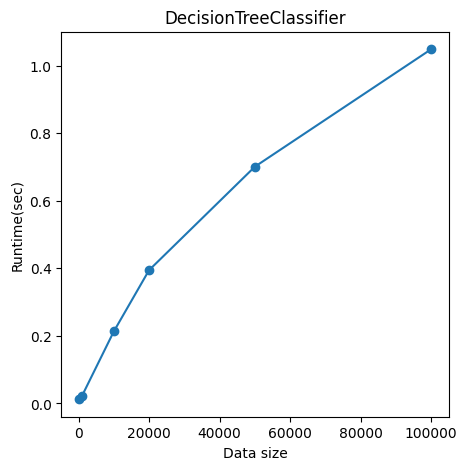

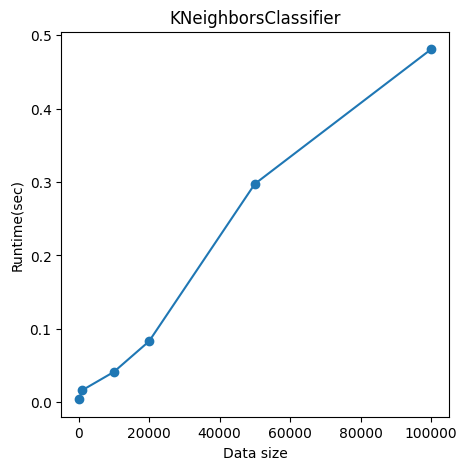

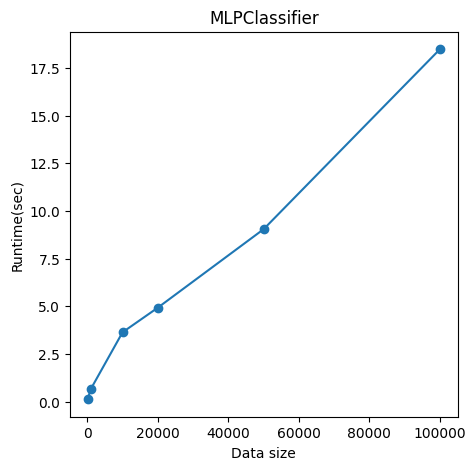

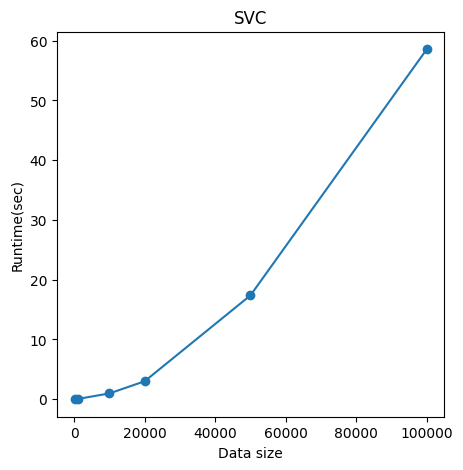

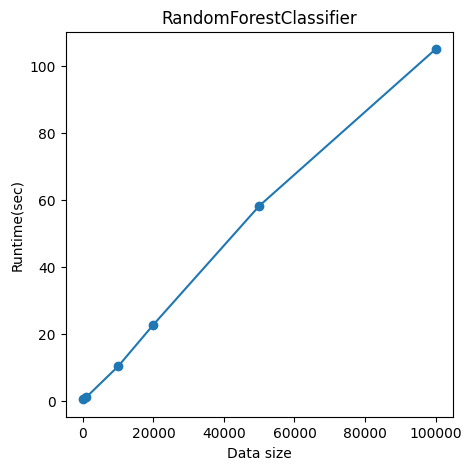

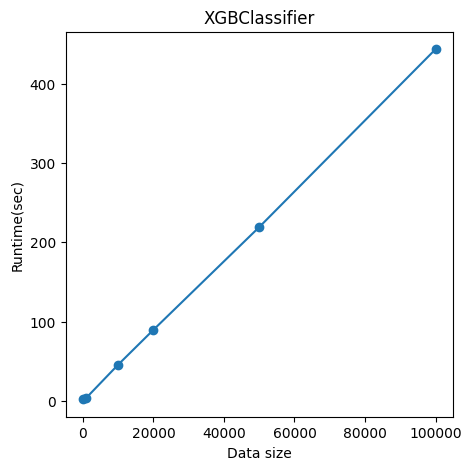

In [67]:
data_sizes = [100, 1000, 10000, 20000, 50000, 100000]
for i, model in enumerate(models):
  runtimes = []
  for size in data_sizes:
      data_x = data_x_full.head(size)
      data_y = data_y_full.head(size) 
      data_y_encoded = data_y_full_encoded.head(size)
      
      start_time = time.time()
      if model_names[i] == 'XGBClassifier':
        model.fit(data_x, data_y_encoded)
      else:
        model.fit(data_x, data_y)
      end_time = time.time()
      runtime = end_time - start_time

      runtimes.append(runtime)

  plt.figure(figsize=(5, 5))
  plt.plot(data_sizes, runtimes, marker='o')
  plt.title(model_names[i])
  plt.xlabel('Data size')
  plt.ylabel('Runtime(sec)')
  plt.show()

Za treniranje *ensemble* modela je potrebno vise vremena, sto je i ocekivano.  
Mada mozemo primetiti da je za **RandomForestClassifier** potrebno **4 puta manje** vremena nego za **XGBClassifier**.

S toga, model koji se najbolje pokazao na nasem skupu podataka je ubedljivo **RandomForestClassifier**